In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import cv2
import imghdr

In [ ]:
# Define functions to connect to Google and change directories
def connectDrive():
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

def changeDirectory(path):
    import os
    original_path = os.getcwd()
    os.chdir(path)
    new_path = os.getcwd()
    print("Original path: ",original_path)
    print("New path: ",new_path)

# Connect to Google Drive
connectDrive()

# Change path
changeDirectory("/content/drive/My Drive/Car-classification/")

In [ ]:
data_dir = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 329 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

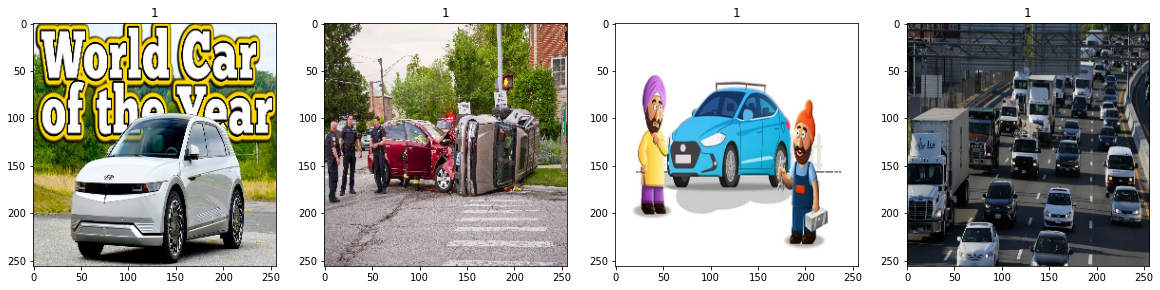

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[4.08915430e-01, 5.05729139e-01, 1.15395218e-01],
          [3.87040436e-01, 4.77022052e-01, 1.18321076e-01],
          [2.69393384e-01, 3.72901350e-01, 5.02450997e-03],
          ...,
          [4.66590077e-01, 5.12101710e-01, 1.86366424e-01],
          [4.29136038e-01, 4.65042889e-01, 1.37714460e-01],
          [4.93183225e-01, 5.52267134e-01, 2.01976106e-01]],
 
         [[4.62898284e-01, 5.19178927e-01, 1.81479782e-01],
          [3.80575985e-01, 4.36565578e-01, 1.03492647e-01],
          [3.85906875e-01, 4.58440572e-01, 1.30070463e-01],
          ...,
          [6.07306957e-01, 6.46063089e-01, 3.04595590e-01],
          [4.90134805e-01, 5.13664186e-01, 2.31832102e-01],
          [6.06295943e-01, 6.57276332e-01, 3.06295961e-01]],
 
         [[4.02726710e-01, 4.50643390e-01, 1.11672796e-01],
          [4.05652583e-01, 4.37515318e-01, 1.33593753e-01],
          [3.85355383e-01, 4.36825991e-01, 1.53308824e-01],
          ...,
          [6.72457099e-01, 7.27742016e-01, 3.8149

# Splitting the data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(256,256,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

In [ ]:
model.add(Flatten())
model.add(Dense(256, activation='LeakyReLU'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adamax', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 256)               524544    
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
hist = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
7/7 [==============================] - 11s 846ms/step - loss: 1.5195 - accuracy: 0.5848 - val_loss: 0.5907 - val_accuracy: 0.6562
Epoch 2/30
7/7 [==============================] - 6s 679ms/step - loss: 0.7255 - accuracy: 0.6161 - val_loss: 0.4652 - val_accuracy: 0.7708
Epoch 3/30
7/7 [==============================] - 7s 743ms/step - loss: 0.5084 - accuracy: 0.7411 - val_loss: 0.4248 - val_accuracy: 0.8125
Epoch 4/30
7/7 [==============================] - 8s 692ms/step - loss: 0.4352 - accuracy: 0.8125 - val_loss: 0.3952 - val_accuracy: 0.8021
Epoch 5/30
7/7 [==============================] - 7s 705ms/step - loss: 0.4044 - accuracy: 0.8259 - val_loss: 0.4280 - val_accuracy: 0.7917
Epoch 6/30
7/7 [==============================] - 7s 705ms/step - loss: 0.4249 - accuracy: 0.7946 - val_loss: 0.4647 - val_accuracy: 0.7708
Epoch 7/30
7/7 [==============================] - 9s 1s/step - loss: 0.4416 - accuracy: 0.7946 - val_loss: 0.5745 - val_accuracy: 0.6667
Epoch 8/30
7/7 [======

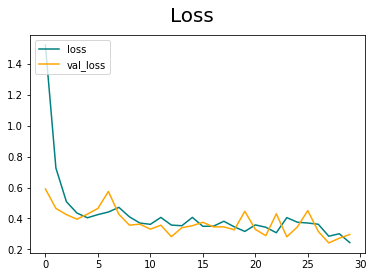

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

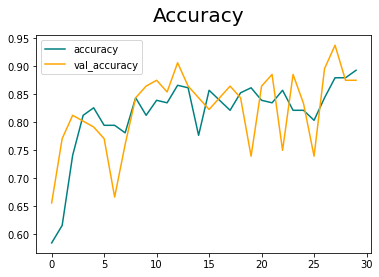

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluation**

In [ ]:
from tensorflow.keras.metrics import BinaryAccuracy
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 40ms/step


In [ ]:
print(f"Training Accuracy Of Model   : {round(acc.result().numpy()*100,2)}%")

Training Accuracy Of Model   : 77.78%


# Test Model with unkown data

In [ ]:
def cust_test(path):
  img = cv2.imread(path)

  plt.imshow(img)
  
  resized_img = tf.image.resize(img, (256,256))
  #plt.imshow(resized_img.numpy().astype(int))
  #plt.show()
  prediction = model.predict(np.expand_dims(resized_img/255, 0),verbose=0)

  if prediction > 0.5: 
      plt.title(label='Non-Crash',fontsize=20,color="green")
  else:
      plt.title(label='Crash',fontsize=20,color="red")
  plt.show()

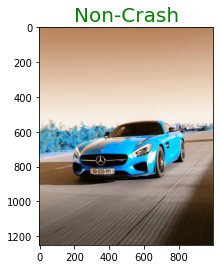

In [ ]:
cust_test('/content/photo-1605559424843-9e4c228bf1c2.jpg')

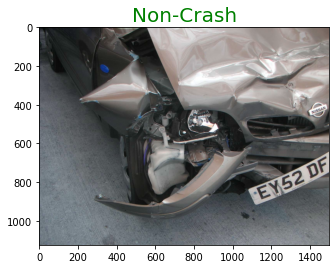

In [ ]:
cust_test('/content/test_img.jpg')

# Save model


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('','car-crash-classifier-v2(89.77-87).h5'))